<div class="alert alert-block alert-success">
<h1>Exploratory Data Analysis - Restaurant Tips</h1> 

- **Problem to solve:** Who is the group that gives a more generous tip? what are the hidden patterns in this restaurant dataset? What is the relationship between the gender, the group size, day of the week, if the customer is a smoker or not, or if the service is for lunch or dinner in relationship with the tip given by the customer?
    
**Data Information:** 
   - Total Bill, total amount to pay
   - Tip, tip provided after the service
   - Sex, gender of the person who pays (assumption)
   - Smoker, the customer goes to the allowed smoking section or not
   - Day, the restaurant  opens from Thursday to Sunday
   - Time, the restaurant serves lunch and dinner
   - Size, group size 

In [1]:
# Import the requierd libraries

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# Load the tips dataset, part of Seaborn library

tips = sns.load_dataset('tips')

In [3]:
# Take a look at the data

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
# Select categorical columns

cat_var = tips[['sex', 'smoker', 'day', 'time', 'size']]

In [5]:
# Count the values of each one of the categorical variables

for column in cat_var.columns:
     print("\n" + column)
     print(cat_var[column].value_counts())


sex
Male      157
Female     87
Name: sex, dtype: int64

smoker
No     151
Yes     93
Name: smoker, dtype: int64

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

time
Dinner    176
Lunch      68
Name: time, dtype: int64

size
2    156
3     38
4     37
5      5
1      4
6      4
Name: size, dtype: int64


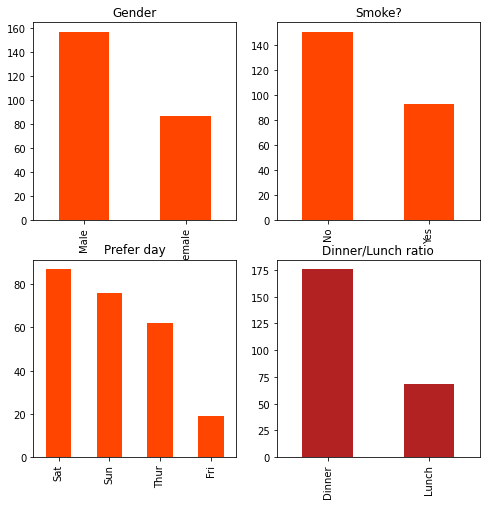

In [6]:
# Let's plot each one of the categorical variables

plt.figure(figsize=[8, 8])

plt.subplot(2, 2, 1) # row 1, col 2 index 1
tips['sex'].value_counts().plot(kind='bar', color='orangered')
plt.title("Gender")

plt.subplot(2, 2, 2) # index 2
tips['smoker'].value_counts().plot(kind='bar', color='orangered')
plt.title("Smoke?")

plt.subplot(2, 2, 3) # index 3
tips['day'].value_counts().plot(kind='bar', color='orangered')
plt.title("Prefer day")

plt.subplot(2, 2, 4) # index 4
tips['time'].value_counts().plot(kind='bar', color='firebrick')
plt.title("Dinner/Lunch ratio");

<div class="alert alert-block alert-info">

**Observation:**

- Most of the customers are Male, 64% (assuming the person in a group who pays the bills)
- Over 61% of customers are nonsmokers
- The least popular day to eat is on Friday, with only 7% of the total
- Over 72% of customers go there for dinner

**Per every customer that has lunch, there are approximately 2.6 customers having dinner**



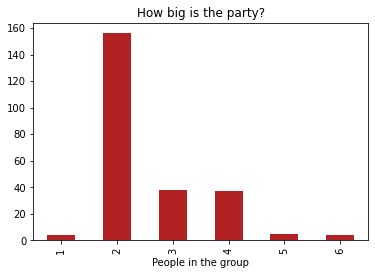

In [7]:
# We notice that the restaurant customers could be as small as one person and as big as 6, let's plot it.

plt.title("How big is the party?")
plt.xlabel("People in the group")
tips['size'].value_counts().sort_index().plot(kind='bar', color='firebrick');

<div class="alert alert-block alert-info">

**Observation:**
Big part of the customers goes in pairs, 63% of the counts.

In [8]:
# On average, when do people pay more tips? During lunch or dinner?

tips.groupby(['time'])['tip'].mean()

time
Lunch     2.728088
Dinner    3.102670
Name: tip, dtype: float64

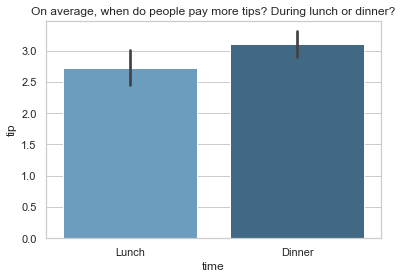

In [9]:
sns.set_theme(style="whitegrid")
sns.barplot(x='time',y='tip',data=tips, palette="Blues_d").set(title='On average, when do people pay more tips? During lunch or dinner?'); 

In [10]:
# Similarly, we can find for an average tip for smokers and gender category
# Let's put it more like a pivot structure

tips.groupby(['smoker','sex'])['tip'].mean().unstack()

sex,Male,Female
smoker,,
Yes,3.051167,2.931515
No,3.113402,2.773519


In [11]:
# Similarly, a cross table can be created for all other variables, like smoker & day, size and day, etc. to find the insight

tips.groupby(['smoker','sex','day','size'])['tip'].mean().unstack()

size                   1         2         3         4     5    6
smoker sex    day                                                
Yes    Male   Thur   NaN  2.822500  4.000000  4.000000   NaN  NaN
              Fri   1.92  2.546667       NaN  4.730000   NaN  NaN
              Sat    NaN  2.318235  4.602500  3.384000  3.00  NaN
              Sun    NaN  3.314000  3.750000  5.090000  2.00  NaN
       Female Thur   NaN  2.540000  3.230000  5.000000   NaN  NaN
              Fri    NaN  2.682857       NaN       NaN   NaN  NaN
              Sat   1.00  2.721818  4.500000  3.090000   NaN  NaN
              Sun    NaN  3.500000  3.500000       NaN   NaN  NaN
No     Male   Thur   NaN  2.559375  2.180000  4.000000  5.00  6.7
              Fri    NaN  2.500000       NaN       NaN   NaN  NaN
              Sat    NaN  2.520588  3.356667  5.191667   NaN  NaN
              Sun    NaN  2.590000  3.020000  3.820000  5.00  5.0
       Female Thur  1.83  2.158421  1.360000  4.045000   NaN  4.6
              Fri    NaN  3.250000  3.000000       NaN   NaN  NaN
              Sat   1.00  2.653750  3.580000  2.450000   NaN  NaN
              Sun    NaN  2.548000  2.792500  4.390000  5.14  NaN

In [12]:
# Feature engineering; What is the percentage of tips about the total bill?
# We add a new column called tips_percentage

tips['tips_percentage'] = tips['tip'] / tips['total_bill']

In [13]:
# Let's take a look at the top 5 tip percentage givers

tips.sort_values(by = 'tips_percentage', ascending = False).head(5)

,total_bill,tip,sex,smoker,day,time,size,tips_percentage
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535


<div class="alert alert-block alert-info">

**Observation:**
The top tip percentage givers show that the total bill was relatively low. Therefore any tip giving would be substantially significant; we see the same pattern in males and females.

In [14]:
# Let's take a look at the top 5 tip  givers

tips.sort_values(by = 'tip', ascending = False).head(5)

,total_bill,tip,sex,smoker,day,time,size,tips_percentage
170,50.81,10.00,Male,Yes,Sat,Dinner,3,0.196812
212,48.33,9.00,Male,No,Sat,Dinner,4,0.186220
23,39.42,7.58,Male,No,Sat,Dinner,4,0.192288
59,48.27,6.73,Male,No,Sat,Dinner,4,0.139424
141,34.30,6.70,Male,No,Thur,Lunch,6,0.195335


<div class="alert alert-block alert-info">

**Observation:**
Those giving the highest tips are usually customers who pay a high bill, typically dinner and males; we see a clear pattern here.

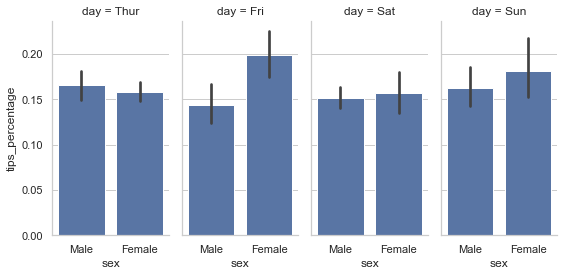

In [15]:
# What is the relationship between the day of the week, the gender, and the tips percentage?

g = sns.FacetGrid(tips, col="day", height=4, aspect=.5)
g.map(sns.barplot, "sex", "tips_percentage", order=["Male", "Female"]);

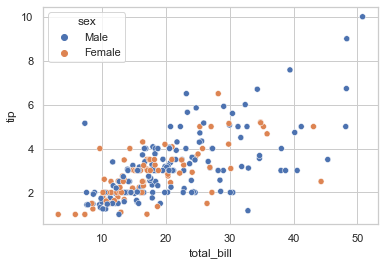

In [16]:
# Let's add the column sex to understand the data better with color-coded effect.

sns.scatterplot(x = 'total_bill', y = 'tip', data=tips, hue = 'sex');

<div class="alert alert-block alert-info">

**Observation:**
- There is a clear relationship between the tip and the total bill; the higher the bill, usually the higher the tip.
- The scatter plot shows that males usually pay higher bills and also higher tips.

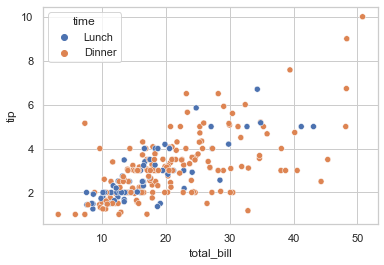

In [17]:
# Visualization by time
sns.scatterplot(x = 'total_bill', y = 'tip', data=tips, hue = 'time');

<div class="alert alert-block alert-info">

**Observation:**
- The scatter plot clearly shows that dinner is the time when customers pay higher bills and also higher tips.

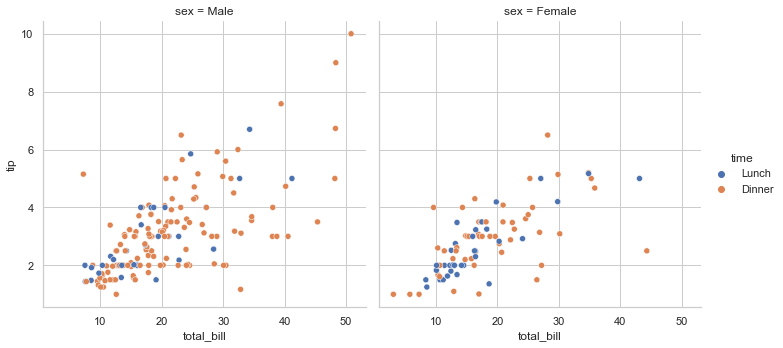

In [18]:
# Creating the bifurcation of time on the chart above based on columns sex

sns.relplot(x = 'total_bill', y = 'tip', data=tips, col = 'sex', hue = 'time');

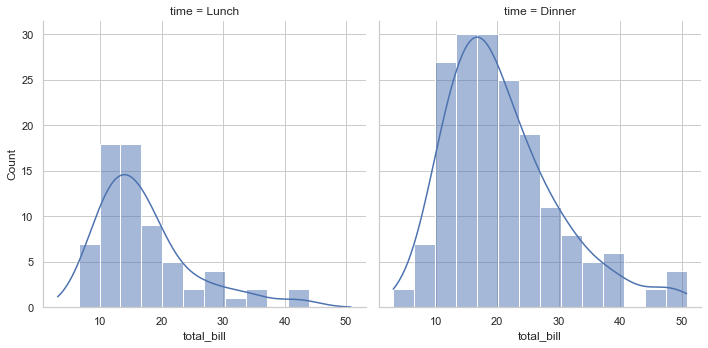

In [19]:
# Let's look at the distribution of total bill by time

sns.displot(x = 'total_bill', data=tips, col = 'time', kde=True);

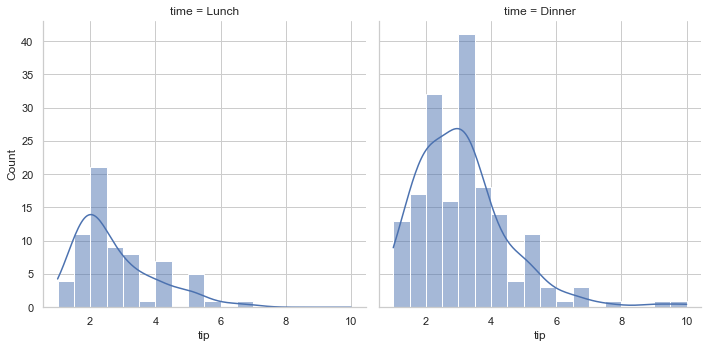

In [20]:
# Let's look at the distribution of total bill by tip
sns.displot(x = 'tip', data=tips, col = 'time', kde=True);